# Florestas aleatórias

In [1]:
# Importanto bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar

# Importa o modelo de regressão linear
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Importando os dados das inscrições
subs_total = pd.read_csv('Inscritos(Total).csv', sep=';')

# Separando colunas
X = subs_total.iloc[:, :-1].values  # independent variables
Y = subs_total.iloc[:, -1:].values  # outcome to be predicted

In [2]:
############################
#  Carimbo de data/hora    #
############################

first_sub_date = {
    2016.1 : calendar.timegm(datetime.datetime.strptime("24/07/2016 20:53:04", "%d/%m/%Y %H:%M:%S").utctimetuple()),
    2016.2 : calendar.timegm(datetime.datetime.strptime("12/10/2016 21:01:35", "%d/%m/%Y %H:%M:%S").utctimetuple()),
    2017.1 : calendar.timegm(datetime.datetime.strptime("2017/07/19 9:03:16 PM", "%Y/%m/%d %I:%M:%S %p").utctimetuple()),
    2017.2 : calendar.timegm(datetime.datetime.strptime("18/10/2017 20:57:02", "%d/%m/%Y %H:%M:%S").utctimetuple()),
    2018.1 : calendar.timegm(datetime.datetime.strptime("16/05/2018 16:06:10", "%d/%m/%Y %H:%M:%S").utctimetuple())
}

# Transformar as datas de inscrição em timestamps do UNIX
for i in range(len(X)):
    if (X[i][0] == 2017.1):
        date = datetime.datetime.strptime(X[i][1], "%Y/%m/%d %I:%M:%S %p ")
    else:
        date = datetime.datetime.strptime(X[i][1], "%d/%m/%Y %H:%M:%S")
        
    X[i][1] = calendar.timegm(date.utctimetuple()) - first_sub_date[X[i][0]]

In [3]:
##############
#  Gênero    #
##############

has_team = {
    'M': 1,
    'F': 0
}

for i in range(len(X)):
    X[i][3] = has_team.get(X[i][3], 0)

In [4]:
#################################################
#  Qual a sua escola / faculdade / instituto?   #
#################################################

institutes = {
    'Escola Politécnica (Poli)' : 1,
    'Instituto de Matemática e Estatística (IME)' : 2,
    'Escola de Artes, Ciências e Humanidades (EACH)' : 3,
    'Faculdade de Economia, Administração e Contabilidade (FEA)' : 4,
    'Instituto de Ciências Matemáticas e de Computação (ICMC)' : 5,
    'Escola de Engenharia de São Carlos (EESC)' : 6,
    'Faculdade de Arquitetura e Urbanismo (FAU)' : 7,
    'Instituto de Física (IF)' : 8,
    'Faculdade de Economia, Administração e Contabilidade de Ribeirão Preto (FEA-RP)' : 9,
    'Escola de Comunicações e Artes (ECA)' : 10,
    'Faculdade de Ciências Farmacêuticas (FCF)' : 11,
    'Faculdade de Direito (FD)' : 12,
    'Faculdade de Filosofia, Letras e Ciências Humanas (FFLCH)' : 13,
    'Instituto de Astronomia, Geofísica e Ciências Atmosféricas (IAG)' : 14,
    'Escola de Engenharia de Lorena (EEL)' : 15,
    'Curso de Ciências Moleculares (CCM)' : 16,
    'Faculdade de Filosofia, Ciências e Letras de Ribeirão Preto (FFCLRP)' : 17,
    'Instituto de Ciências Biomédicas (ICB)' : 18,
    'Faculdade de Medicina de Ribeirão Preto (FMRP)' : 19,
    'Instituto de Química (IQ)' : 20,
    'Escola de Engenharia de São Carlos (EESC)' : 21,
    'Escola de Engenharia de São Carlos (EESC) ' : 21,
    'Faculdade de Odontologia (FO)' : 22,
    'Faculdade de Saúde Pública (FSP)' : 23,
    'Faculdade de Zootecnia e Engenharia de Alimentos (FZEA)' : 24,
    'Instituto de Física de São Carlos (IFSC)' : 25,
    'Instituto de Relações Internacionais (IRI)' : 26,
    'Escola Superior de Agricultura “Luiz de Queiroz”' : 27
}

for i in range(len(X)):
    X[i][4] = institutes.get(X[i][4], 0)

In [5]:
##########################################
#  Qual o seu curso / programa de pós?   #
##########################################

courses = {
    'Bacharelado em Ciência da Computação' : 1,
    'Bacharelado em Ciência da computação' : 1,
    'Bacharelado em CIência da Computação' : 1,
    'Bacharelado em Ciências de Computação' : 1,
    'Bacharelado em Sistemas de Informação' : 2,
    'Engenharia Elétrica' : 3,
    'Engenharia da Computação' : 4,
    'Bacharelado em Administração' : 5,
    'Bacharelado em Marketing' : 6,
    'Bacharelado em Marketing ' : 6,
    'Bacharelado em Matemática Aplicada e Computacional' : 7,
    'Engenharia Mecatrônica' : 8,
    'Engenharia Mecatrônica ' : 8,
    'Bacharelado em Economia' : 9,
    'Bacharelado em Economia ' : 9,
    'Bacharelado em Economia ' : 9,
    'Pós-graduação em Ciência da Computação' : 10,
    'Bacharelado em Design' : 11,
    'Bacharelado em Física' : 12,
    'Bacharelado em Estatística' : 13,
    'Bacharelado em Estatística ' : 13,
    'Engenharia Mecânica' : 14,
    'Engenharia de Produção' : 15,
    'Engenharia de Produção ' : 15,
    'Economia Empresarial e Controladoria' : 16,
    'Economia Empresarial e Controladoria ' : 16,
    'Curso de Ciências Moleculares' : 17,
    'Publicidade e Propaganda' : 18,
    'Pós-graduação em Engenharia da Computação' : 19,
    'Engenharia Civil' : 20,
    'Engenharia Química' : 21,
    'Engenharia Química ' : 21,
    'Direito' : 22,
    'Informática Biomédica' : 23,
    'Mestrado em Ciência da Computação' : 10,
    'Ciências Contábeis' : 24,
    'Bacharelado em Matemática Aplicada' : 25,
    'Pós-graduação em Sistemas de Informação' : 26,
    'Farmácia-Bioquímica' : 27,
    'Mestrado em Sistemas de Informação' : 26,
    'Engenharia de Materiais' : 28,
    'Engenharia de Minas' : 29,
    'Arquitetura e Urbanismo' : 30,
    'Ciências Atuariais' : 31,
    'Ciências Sociais' : 32,
    'Bacharelado em Ciências da Computação' : 1,
    'Big Data Inteligência na Gestão dos Dados' : 33,
    'Doutorado em Ciência da Computação' : 34,
    'Engenharia Ambiental' : 35,
    'Gestão Ambiental' : 36,
    'Engenharia Naval' : 37,
    'Licenciatura em Matemática' : 38,
    'Letras' : 39,
    'Ciencias Biomédicas ' : 40,
    'Engenharia' : 3,
    'Contabilidade' : 24,
    'Doutorado em Engenharia da Computação' : 41,
    'Licenciatura em Ciências da Natureza' : 42,
    'Relações Públicas' : 43,
    'Engenharia Física' : 44,
    'Bacharelado em Matemática' : 45,
    'Bacharelado em Matemática ' : 45,
    'Bacharelado em Matemática Pura' : 45,
    'Segurança da Informação ' : 46,
    'Ciências Econômicas' : 9,
    'Filosofia' : 47,
    'Pós-graduação em Empreendedorismo e Inovação' : 48,
    'Pós-graduação em Sistemas Eletrônicos' : 49,
    'Física Computacional' : 50,
    'MBA - Tecnologia de Software' : 51,
    'Pós-graduação em Engenharia Elétrica' : 52,
    'Engenharia do Petróleo' : 53,
    'Tecnologia de Software' : 54,
    'Geofísica' : 55,
    'Pós-graduação em Bioinformática' : 56,
    'Farmácia e Bioquímica ' : 57,
    'Farmácia e Bioquímica' : 57,
    'Pós-graduacão em Sistemas de Informação' : 58,
    'Gestão de Políticas Públicas' : 59,
    'Gestão de Políticas Públicas ' : 59,
    'Modelagem de Sistemas Complexos' : 60,
    'Pós-graduação em Matemática Aplicada' : 61,
    'Mestrado em Administração' : 62,
    'Pós-graduação em Marketing' : 63,
    'Pós-graduação em Administração de Organizações' : 64,
    'Pós-graduação em Astronomia' : 65,
    'MBA em IoT' : 51,
    'Engenharia Aeronáutica ' : 66,
    'Pós-graduação em Farmácia e Bioinformática' : 67,
    'Fisiopatologia e Toxicologia' : 68,
    'Doutorado em Administração ' : 69,
    'Turismo' : 70,
    'Pós-graduação em Administração' : 71,
    'Pós-graduação em Tecnologia Nuclear ' : 72,
    'Pós-graduação em Engenharia Mecânica' : 73,
    'Pós-graduação em Engenharia Mecatrônica' : 74,
    'PECE' : 75,
    'Mestrado em Ciências' : 76,
    'Mestrado em Ciência da Informação' : 77,
    'Pós-doutorado em Astronomia' : 78,
    'Pós-graduação em Ciências de Computação e Matemática Computacional' : 79,
    'Mestrado Profissional Ambiente, Saúde e Sustentabilidade' : 80,
    'Pedagogia' : 81,
    'Pós-graduação em Engenharia Ambiental' : 82,
    'Pós-graduação em Engenharia Química/ Tecnologia de Software' : 83,
    'Pós-graduação em Inovação na Construção Civil' : 84,
    'Engenharia de Biossistemas ' : 85,
    'Bacharelado em Meteorologia' : 86,
    'Pós-doutorado em Engenharia da Produção' : 87,
    'Pós-graduação em Ciências Odontológicas' : 88,
    'Pós-graduação em Física' : 89,
    'Mestrado em Engenharia Mecatrônica' : 90,
    'Análise e Desenvolvimento de Sistemas' : 91,
    'Engenharia Bioquímica' : 92,
    'Pós-graduação em Big Data' : 93,
    'Especialização' : 94,
    'Pós-graduação em Economia ' : 95,
    'Engenharia Metalurgica' : 96,
    'Engenharia e Gestão de Novos Produtos e Serviços ' : 97,
    'Educação Física e Saúde' : 98,
    'Música' : 99,
    'Relações Internacionais' : 100,
    'Linguística' : 101,
    'Engenharia de Software' : 102,
    'Pós-graduação em Tecnologia e Gestão na Produção de Edificios' : 103,
    'Mestrado em Engenharia Elétrica' : 104
}

for i in range(len(X)):
    X[i][5] = courses.get(X[i][5], 0)

In [6]:
############################
#  Em que ano você está?   #
###########################

years = {
    '1º ano' : 1,
    '2º ano' : 2,
    '3º ano' : 3,
    '4º ano' :4,
    '5º ano' : 5,
    '5º ano ou mais' : 5,
    '6º ano ou mais' : 5,
    'Pós-graduação' : 6,
    'Doutorado' : 7
}

for i in range(len(X)):
    X[i][6] = years.get(X[i][6], 0)

In [7]:
################################
#  Qual a sua especialidade?   #
################################

specialties = {
    'Desenvolvedor' : 1,
    'Desenvolvedor/Designer' : 1,
    'Desenvolvedor/Negócios' : 1,
    'Negócios e Desenvolvedor' : 1,
    'Empreendedor/Negócios' : 2,
    'Negócios': 2,
    'Designer' : 3,
    'Designer/Negócios' : 3,
    'Cientista de Dados' : 4,
    'Nenhuma' : 5,
    'Estudante' : 5,
    'Marketing' : 6,
    'Engenharia' : 7,
    'Comunicação/Publicidade' : 8,
    'Comunicação digital' : 8,
    'Pesquisador' : 9,
    'Quimica' : 10,
    'Farmácia' : 11,
    'Analista' : 12,
    'Gestão de Projetos' : 13,
    'Mentoria' : 14
}

for i in range(len(X)):    
    X[i][8] = specialties.get(X[i][8], 0)

In [8]:
##################################
#  Você já tem equipe formada?   #
##################################

has_team = {
    'Sim': 1,
    'Não': 0
}

for i in range(len(X)):
    X[i][9] = has_team.get(X[i][9], 0)

In [9]:
###################
#  Selecionado    #
###################

selected = {
    'S' : 1,
    'N' : 0
}

for i in range(len(Y)):
    Y[i][0] = selected.get(Y[i][0], 0)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
rf = RandomForestClassifier(n_estimators=1000)
y_train = [i[0] for i in y_train]
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
y_test = [i[0] for i in y_test]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[197  10]
 [ 42  77]]


In [14]:
sens = cm[0][0] / (cm[0][0] + cm[1][0])
acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])

print('Sensitivity: ')
print(sens)
print('-------------')
print('Accuracy: ')
print(acc)

Sensitivity: 
0.8242677824267782
-------------
Accuracy: 
0.8404907975460123


Normalized confusion matrix
[[0.95169082 0.04830918]
 [0.35294118 0.64705882]]


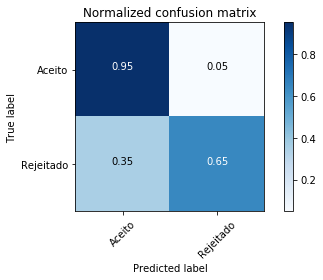

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Aceito', 'Rejeitado'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()